# **Data Collection & Preprocessing: Handling Missing Values**

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.4 MB/s eta 0:00:00
===== ORIGINAL DATA WITH MISSING VALUES & OUTLIERS =====
     age    salary  hours_worked
0   58.0   25189.0          11.0
1   48.0   89445.0           8.0
2   34.0   44118.0          11.0
3   27.0       NaN           8.0
4   40.0   78810.0           9.0
5   58.0  300000.0          11.0
6   38.0   81886.0           7.0
7   42.0   26267.0          10.0
8   30.0   56551.0           5.0
9   30.0   75680.0           8.0
10  43.0   36394.0           NaN
11  55.0   28556.0           8.0
12  59.0   28890.0           6.0
13  43.0   66606.0          10.0
14  22.0   55740.0          10.0


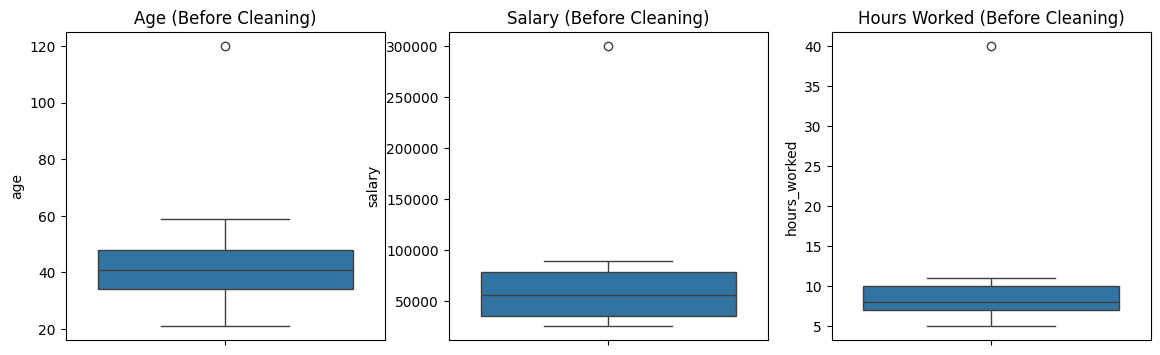

/tmp/ipython-input-2301486004.py:65: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled["age"].fillna(df["age"].median(), inplace=True)
/tmp/ipython-input-2301486004.py:66: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru


===== AFTER HANDLING MISSING VALUES =====
     age         salary  hours_worked
0   58.0   25189.000000          11.0
1   48.0   89445.000000           8.0
2   34.0   44118.000000          11.0
3   27.0   63125.931034           8.0
4   40.0   78810.000000           9.0
5   58.0  300000.000000          11.0
6   38.0   81886.000000           7.0
7   42.0   26267.000000          10.0
8   30.0   56551.000000           5.0
9   30.0   75680.000000           8.0
10  43.0   36394.000000           8.0
11  55.0   28556.000000           8.0
12  59.0   28890.000000           6.0
13  43.0   66606.000000          10.0
14  22.0   55740.000000          10.0

===== AFTER IQR OUTLIER REMOVAL =====
     age         salary  hours_worked
0   58.0   25189.000000          11.0
1   48.0   89445.000000           8.0
2   34.0   44118.000000          11.0
3   27.0   63125.931034           8.0
4   40.0   78810.000000           9.0
5   58.0  141482.375000          11.0
6   38.0   81886.000000           7.0
7   42

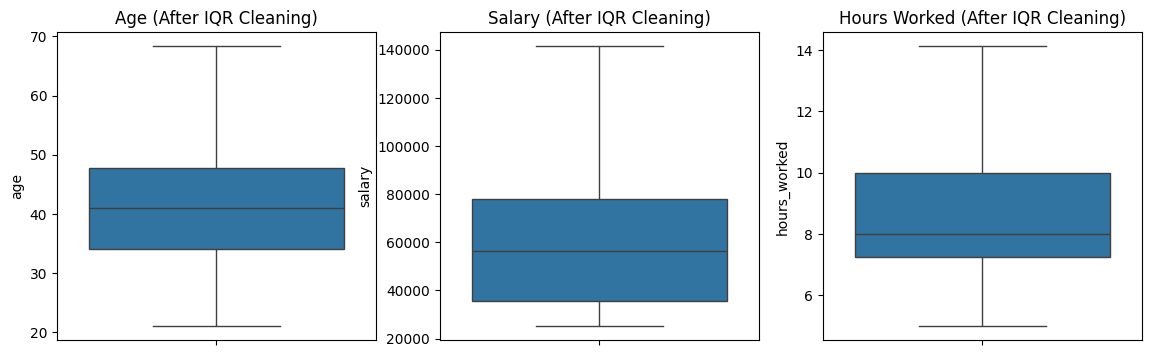

 _____       _______          _____ _      ______          _   _ ______ _____  
|  __ \   /\|__   __|/\      / ____| |    |  ____|   /\   | \ | |  ____|  __ \ 
| |  | | /  \  | |  /  \    | |    | |    | |__     /  \  |  \| | |__  | |  | |
| |  | |/ /\ \ | | / /\ \   | |    | |    |  __|   / /\ \ | . ` |  __| | |  | |
| |__| / ____ \| |/ ____ \  | |____| |____| |____ / ____ \| |\  | |____| |__| |
|_____/_/    \_\_/_/    \_\  \_____|______|______/_/    \_\_| \_|______|_____/ 
                                                                               
                                                                               



In [1]:
# Handling Missing Values & Outliers Project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# (Only for ASCII Output)
!pip install pyfiglet
import pyfiglet

# 1. Create sample dataset
np.random.seed(42)

data = {
    "age": np.random.randint(20, 60, 30),
    "salary": np.random.randint(25000, 90000, 30),
    "hours_worked": np.random.randint(5, 12, 30)
}

df = pd.DataFrame(data)

# Introduce missing values
df.loc[3, "salary"] = np.nan
df.loc[10, "hours_worked"] = np.nan
df.loc[22, "age"] = np.nan

# Introduce outliers
df.loc[5, "salary"] = 300000
df.loc[15, "hours_worked"] = 40
df.loc[25, "age"] = 120

print("===== ORIGINAL DATA WITH MISSING VALUES & OUTLIERS =====")
print(df.head(15))

# 2. Graphs — Before Cleaning
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
sns.boxplot(df["age"])
plt.title("Age (Before Cleaning)")

plt.subplot(1,3,2)
sns.boxplot(df["salary"])
plt.title("Salary (Before Cleaning)")

plt.subplot(1,3,3)
sns.boxplot(df["hours_worked"])
plt.title("Hours Worked (Before Cleaning)")

plt.show()

# 3. Handling Missing Values
df_filled = df.copy()

df_filled["age"].fillna(df["age"].median(), inplace=True)
df_filled["salary"].fillna(df["salary"].mean(), inplace=True)
df_filled["hours_worked"].fillna(df["hours_worked"].median(), inplace=True)

print("\n===== AFTER HANDLING MISSING VALUES =====")
print(df_filled.head(15))

# 4. Handling Outliers — IQR Method
df_iqr = df_filled.copy()

def remove_outliers_iqr(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return col.clip(lower, upper)

df_iqr["age"] = remove_outliers_iqr(df_iqr["age"])
df_iqr["salary"] = remove_outliers_iqr(df_iqr["salary"])
df_iqr["hours_worked"] = remove_outliers_iqr(df_iqr["hours_worked"])

print("\n===== AFTER IQR OUTLIER REMOVAL =====")
print(df_iqr.head(15))

# 5. Handling Outliers — Z-Score Method
df_z = df_filled.copy()

def remove_outliers_z(col):
    mean = col.mean()
    std = col.std()
    z = (col - mean) / std
    return col.where(abs(z) < 3, mean)  # Replace outliers with mean

df_z["age"] = remove_outliers_z(df_z["age"])
df_z["salary"] = remove_outliers_z(df_z["salary"])
df_z["hours_worked"] = remove_outliers_z(df_z["hours_worked"])

print("\n===== AFTER Z-SCORE OUTLIER REMOVAL =====")
print(df_z.head(15))

# 6. Graphs — After Cleaning (IQR)
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
sns.boxplot(df_iqr["age"])
plt.title("Age (After IQR Cleaning)")

plt.subplot(1,3,2)
sns.boxplot(df_iqr["salary"])
plt.title("Salary (After IQR Cleaning)")

plt.subplot(1,3,3)
sns.boxplot(df_iqr["hours_worked"])
plt.title("Hours Worked (After IQR Cleaning)")

plt.show()

# FINAL OUTPUT — ASCII ART (BIG FONT)
ascii_text = pyfiglet.figlet_format("DATA CLEANED", font="big")
print(ascii_text)
